

The Traveling Salesman Problem is like a puzzle for a salesperson. They have to visit a bunch of cities and return home while traveling the shortest possible distance. But there are lots of ways to do it, and figuring out the best route can be really hard. Even though it sounds easy, computers struggle to find the fastest route because there are so many possibilities to check. People use special tricks and algorithms to get close to the best answer without having to check every single option. Like we are using Simulated Annealing.

For simplicity, numbering the cities as 0,1,2,....,10. since there are 11 cities

In [ ]:
import random
import math

# Define the distance matrix between cities
distance_matrix = [
    [0, 29, 20, 21, 16, 31, 100, 12, 4, 31, 18],
    [29, 0, 15, 29, 28, 40, 72, 21, 29, 41, 12],
    [20, 15, 0, 15, 14, 25, 81, 9, 23, 27, 13],
    [21, 29, 15, 0, 4, 12, 92, 12, 25, 13, 25],
    [16, 28, 14, 4, 0, 16, 94, 9, 20, 16, 22],
    [31, 40, 25, 12, 16, 0, 95, 24, 36, 3, 37],
    [100, 72, 81, 92, 94, 95, 0, 90, 101, 99, 84],
    [12, 21, 9, 12, 9, 24, 90, 0, 15, 25, 13],
    [4, 29, 23, 25, 20, 36, 101, 15, 0, 35, 18],
    [31, 41, 27, 13, 16, 3, 99, 25, 35, 0, 38],
    [18, 12, 13, 25, 22, 37, 84, 13, 18, 38, 0]
]

# Function to calculate the total distance of a tour
def calculate_distance(tour):
    total_distance = 0
    for i in range(len(tour) - 1):
        city1 = tour[i]
        city2 = tour[i + 1]
        total_distance += distance_matrix[city1][city2]
    # Add distance from last city back to the starting city
    total_distance += distance_matrix[tour[-1]][tour[0]]
    return total_distance

# Function to generate a random initial solution (random tour)
def generate_initial_solution(num_cities):
    return random.sample(range(num_cities), num_cities)

# Function to generate a random neighboring state of the current solution (tour)
def generate_neighbor(current_tour):
    neighbor_tour = current_tour[:]
    # Swap two random cities to create a neighboring tour
    city1, city2 = random.sample(range(len(current_tour)), 2)
    neighbor_tour[city1], neighbor_tour[city2] = neighbor_tour[city2], neighbor_tour[city1]
    return neighbor_tour

# Function to calculate the acceptance probability for moving to a new solution
def acceptance_probability(old_cost, new_cost, temperature):
    if new_cost < old_cost:
        return 1.0
    return math.exp((old_cost - new_cost) / temperature)

# Simulated Annealing algorithm
def simulated_annealing(num_cities, max_iterations, initial_temperature, cooling_rate):
    # Generate a random initial solution
    current_tour = generate_initial_solution(num_cities)
    current_cost = calculate_distance(current_tour)
    best_tour = current_tour
    best_cost = current_cost
    temperature = initial_temperature

    # Main loop for simulated annealing
    for _ in range(max_iterations):
        # Generate a random neighboring state
        neighbor_tour = generate_neighbor(current_tour)
        neighbor_cost = calculate_distance(neighbor_tour)

        # Decide whether to move to the neighboring state
        if neighbor_cost < current_cost or random.random() < acceptance_probability(current_cost, neighbor_cost, temperature):
            current_tour = neighbor_tour
            current_cost = neighbor_cost

        # Update the best solution found so far
        if current_cost < best_cost:
            best_tour = current_tour
            best_cost = current_cost

        # Update temperature
        temperature *= cooling_rate

    return best_tour, best_cost

# Parameters
num_cities = 11
max_iterations = 10000
initial_temperature = 1000.0
cooling_rate = 0.99

# Run simulated annealing
best_tour, best_cost = simulated_annealing(num_cities, max_iterations, initial_temperature, cooling_rate)

print("Best tour:", best_tour)
print("Best cost:", best_cost)


Best tour: [6, 2, 7, 4, 3, 5, 9, 0, 8, 10, 1]
Best cost: 255


In [ ]:
def generate_neighbor(current_tour):
    # Choose two random indices for swapping
    city1, city2 = random.sample(range(len(current_tour)), 2)

    # Create a new tour by swapping the cities at the chosen indices
    neighbor_tour = current_tour[:]
    neighbor_tour[city1], neighbor_tour[city2] = neighbor_tour[city2], neighbor_tour[city1]

    return neighbor_tour


1. New cost gets worse than the current one:

In this case, the acceptance probability will be less than 1, meaning there's a probability that the algorithm will accept a worse solution.
As the new cost gets worse (i.e., increases), the term ($c_{old} - c_{new}$) in the exponent will become more positive, resulting in a larger exponent value.
When the exponent value becomes larger, the value of $e^{-(c_{old}-c_{new})}$ will decrease, leading to a smaller acceptance probability.
Consequently, when the new cost is worse than the current one, the acceptance probability decreases, making it less likely for the algorithm to accept the new solution. This behavior allows the algorithm to escape local optima and explore the solution space for potentially better solutions.


2. Temperature decreases:

As the temperature decreases, the denominator Tk in the acceptance probability formula decreases as well.
A smaller temperature results in a larger denominator in the exponent.
With a larger denominator, the overall exponent value in the acceptance probability formula increases, leading to a smaller acceptance probability.
Therefore, as the temperature decreases, the acceptance probability decreases as well.
This behavior aligns with the annealing process in simulated annealing. Initially, the algorithm accepts worse solutions with higher probabilities to explore the solution space extensively. As the temperature decreases (annealing), the algorithm becomes less likely to accept worse solutions, focusing more on exploitation to converge towards the optimal solution.

Initial Temperature: 1.0
Best tour: [2, 6, 1, 10, 8, 0, 7, 4, 3, 9, 5]
Best cost: 253


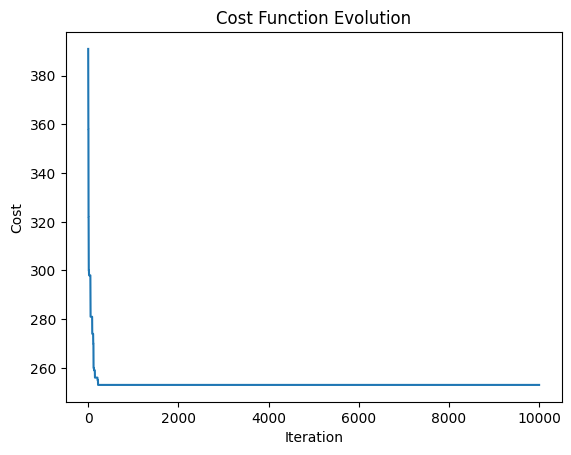

Initial Temperature: 10.0
Best tour: [6, 1, 10, 8, 0, 7, 4, 3, 9, 5, 2]
Best cost: 253


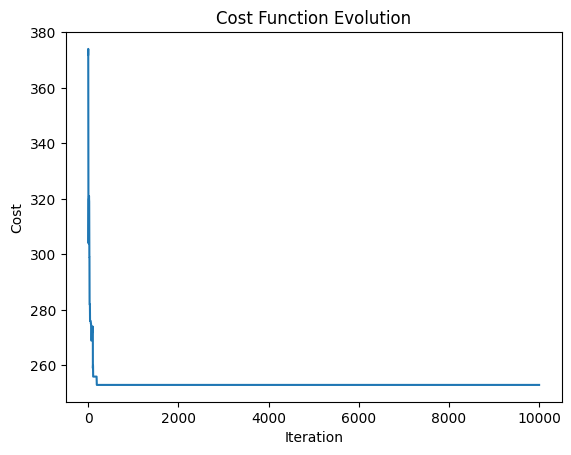

Initial Temperature: 100.0
Best tour: [0, 8, 7, 2, 6, 1, 10, 4, 3, 5, 9]
Best cost: 265


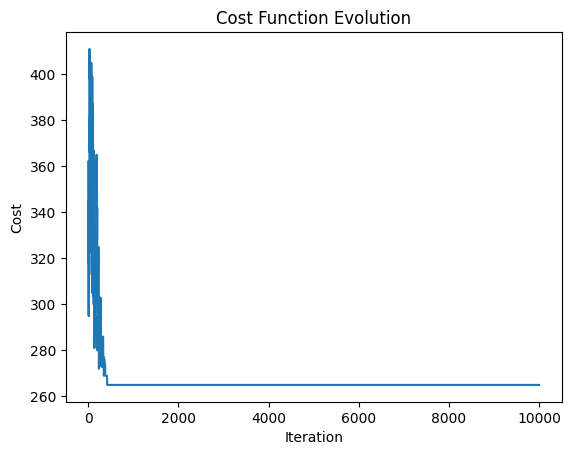

In [ ]:
import random
import math
import matplotlib.pyplot as plt

# Define the distance matrix between cities
distance_matrix = [
    [0, 29, 20, 21, 16, 31, 100, 12, 4, 31, 18],
    [29, 0, 15, 29, 28, 40, 72, 21, 29, 41, 12],
    [20, 15, 0, 15, 14, 25, 81, 9, 23, 27, 13],
    [21, 29, 15, 0, 4, 12, 92, 12, 25, 13, 25],
    [16, 28, 14, 4, 0, 16, 94, 9, 20, 16, 22],
    [31, 40, 25, 12, 16, 0, 95, 24, 36, 3, 37],
    [100, 72, 81, 92, 94, 95, 0, 90, 101, 99, 84],
    [12, 21, 9, 12, 9, 24, 90, 0, 15, 25, 13],
    [4, 29, 23, 25, 20, 36, 101, 15, 0, 35, 18],
    [31, 41, 27, 13, 16, 3, 99, 25, 35, 0, 38],
    [18, 12, 13, 25, 22, 37, 84, 13, 18, 38, 0]
]

# Function to calculate the total distance of a tour
def calculate_distance(tour):
    total_distance = 0
    for i in range(len(tour) - 1):
        city1 = tour[i]
        city2 = tour[i + 1]
        total_distance += distance_matrix[city1][city2]
    # Add distance from last city back to the starting city
    total_distance += distance_matrix[tour[-1]][tour[0]]
    return total_distance

# Function to generate a random initial solution (random tour)
def generate_initial_solution(num_cities):
    return random.sample(range(num_cities), num_cities)

# Function to generate a random neighboring state of the current solution (tour)
def generate_neighbor(current_tour):
    # Choose two random indices for swapping
    city1, city2 = random.sample(range(len(current_tour)), 2)

    # Create a new tour by swapping the cities at the chosen indices
    neighbor_tour = current_tour[:]
    neighbor_tour[city1], neighbor_tour[city2] = neighbor_tour[city2], neighbor_tour[city1]

    return neighbor_tour

# Function to calculate the acceptance probability for moving to a new solution
def acceptance_probability(old_cost, new_cost, temperature):
    if new_cost < old_cost:
        return 1.0
    return math.exp((old_cost - new_cost) / temperature)

# Simulated Annealing algorithm
def simulated_annealing_1(num_cities, max_iterations, initial_temperature, cooling_rate):
    # Generate a random initial solution
    current_tour = generate_initial_solution(num_cities)
    current_cost = calculate_distance(current_tour)
    best_tour = current_tour
    best_cost = current_cost
    temperature = initial_temperature

    # Lists to store cost and iteration data for plotting
    costs = []
    iterations = []

    # Main loop for simulated annealing
    for iteration in range(max_iterations):
        iterations.append(iteration)
        costs.append(current_cost)

        # Generate a random neighboring state
        neighbor_tour = generate_neighbor(current_tour)
        neighbor_cost = calculate_distance(neighbor_tour)

        # Decide whether to move to the neighboring state
        if neighbor_cost < current_cost or random.random() < acceptance_probability(current_cost, neighbor_cost, temperature):
            current_tour = neighbor_tour
            current_cost = neighbor_cost

        # Update the best solution found so far
        if current_cost < best_cost:
            best_tour = current_tour
            best_cost = current_cost

        # Update temperature
        temperature *= cooling_rate

    return best_tour, best_cost, costs, iterations

# Plot the cost function for each iteration
def plot_cost_function(costs, iterations):
    plt.plot(iterations, costs)
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.title('Cost Function Evolution')
    plt.show()

# Parameters
num_cities = 11
max_iterations = 10000
cooling_rate = 0.99

# Run simulated annealing with different initial temperatures
initial_temperatures = [1.0, 10.0, 100.0]

for initial_temperature in initial_temperatures:
    best_tour, best_cost, costs, iterations = simulated_annealing_1(num_cities, max_iterations, initial_temperature, cooling_rate)
    print(f"Initial Temperature: {initial_temperature}")
    print("Best tour:", best_tour)
    print("Best cost:", best_cost)
    plot_cost_function(costs, iterations)


A different cooling schedule that we can consider is the logarithmic cooling schedule. In this schedule, the temperature decreases logarithmically with each iteration. The formula for this cooling schedule can be represented as Tk+1 = T0 / log(k + 1), where k is the iteration number and T0 is the initial temperature.

Best tour (Logarithmic Cooling Schedule): [8, 0, 10, 6, 1, 2, 7, 4, 3, 9, 5]
Best cost (Logarithmic Cooling Schedule): 267


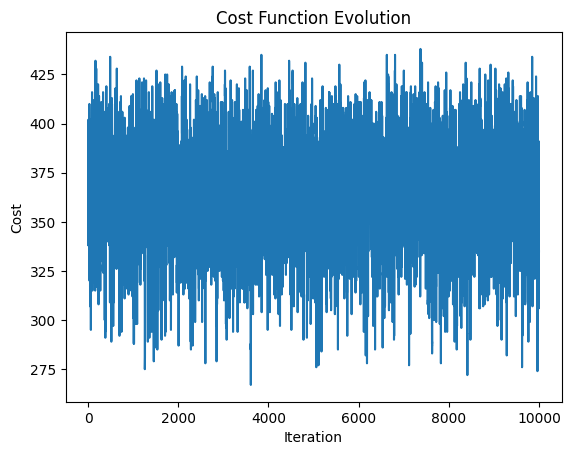

In [ ]:
# Simulated Annealing algorithm with logarithmic cooling schedule
def simulated_annealing_log(num_cities, max_iterations, initial_temperature):
    # Generate a random initial solution
    current_tour = generate_initial_solution(num_cities)
    current_cost = calculate_distance(current_tour)
    best_tour = current_tour
    best_cost = current_cost
    temperature = initial_temperature

    # Lists to store cost and iteration data for plotting
    costs = []
    iterations = []

    # Main loop for simulated annealing
    for iteration in range(max_iterations):
        iterations.append(iteration)
        costs.append(current_cost)

        # Generate a random neighboring state
        neighbor_tour = generate_neighbor(current_tour)
        neighbor_cost = calculate_distance(neighbor_tour)

        # Decide whether to move to the neighboring state
        if neighbor_cost < current_cost or random.random() < acceptance_probability(current_cost, neighbor_cost, temperature):
            current_tour = neighbor_tour
            current_cost = neighbor_cost

        # Update the best solution found so far
        if current_cost < best_cost:
            best_tour = current_tour
            best_cost = current_cost

        # Update temperature using logarithmic cooling schedule
        temperature = initial_temperature / math.log(iteration + 2)  # Add 2 to avoid division by zero

    return best_tour, best_cost, costs, iterations

# Run simulated annealing with logarithmic cooling schedule
initial_temperature = 1000.0
best_tour_log, best_cost_log, costs_log, iterations_log = simulated_annealing_log(num_cities, max_iterations, initial_temperature)

print("Best tour (Logarithmic Cooling Schedule):", best_tour_log)
print("Best cost (Logarithmic Cooling Schedule):", best_cost_log)
plot_cost_function(costs_log, iterations_log)


In [ ]:
import pandas as pd

data = pd.read_csv("/content/TSP48.csv", header=None)
distance_matrix = data.to_numpy()


In [ ]:
 # Parameters
num_cities = 48
max_iterations = 10000
initial_temperature = 1000.0
cooling_rate = 0.99

# Run simulated annealing
best_tour, best_cost = simulated_annealing(num_cities, max_iterations, initial_temperature, cooling_rate)

print("Best tour:", best_tour)
print("Best cost:", best_cost)

Best tour: [41, 25, 3, 2, 8, 30, 43, 17, 20, 38, 31, 23, 44, 34, 9, 42, 16, 26, 29, 10, 22, 11, 32, 45, 14, 39, 21, 15, 40, 33, 28, 1, 4, 24, 12, 46, 19, 35, 5, 18, 36, 27, 6, 37, 7, 0, 13, 47]
Best cost: 57342


Initial Temperature: 1.0
Best tour: [42, 16, 26, 29, 6, 43, 30, 37, 8, 7, 0, 21, 15, 40, 1, 3, 25, 41, 28, 4, 47, 24, 22, 10, 11, 46, 19, 32, 45, 35, 5, 18, 36, 27, 17, 14, 39, 2, 33, 13, 12, 20, 38, 9, 34, 44, 23, 31]
Best cost: 45206


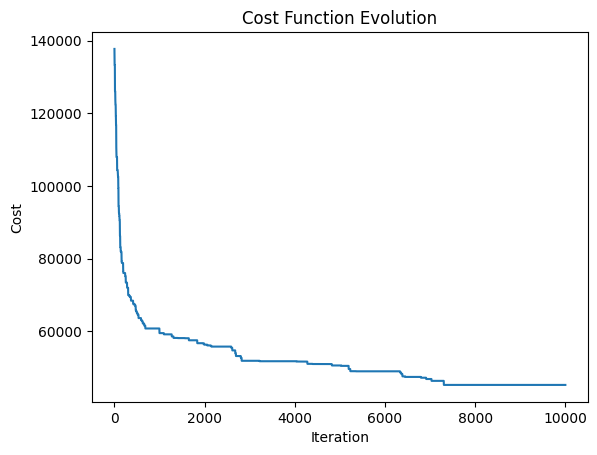

Initial Temperature: 10.0
Best tour: [2, 15, 40, 28, 1, 25, 3, 34, 44, 9, 23, 31, 42, 16, 26, 18, 36, 5, 29, 27, 6, 43, 30, 37, 39, 22, 10, 11, 32, 17, 35, 19, 46, 20, 38, 47, 41, 4, 33, 21, 0, 7, 8, 45, 14, 12, 24, 13]
Best cost: 44518


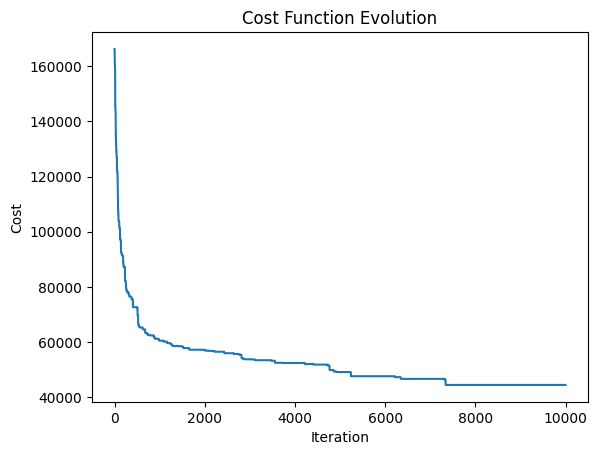

Initial Temperature: 100.0
Best tour: [10, 46, 19, 32, 11, 33, 28, 1, 25, 3, 34, 44, 9, 22, 14, 30, 37, 8, 7, 15, 40, 41, 23, 31, 20, 45, 43, 17, 6, 27, 29, 42, 16, 26, 18, 36, 5, 35, 12, 38, 47, 4, 24, 13, 2, 21, 0, 39]
Best cost: 49779


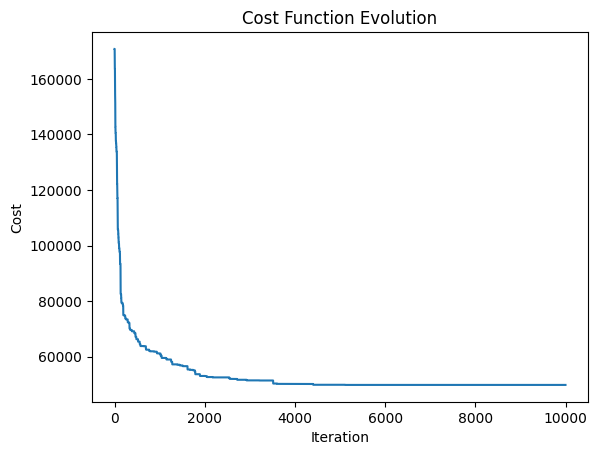

In [ ]:

# Parameters
num_cities = 48
max_iterations = 10000
cooling_rate = 0.99

# Run simulated annealing with different initial temperatures
initial_temperatures = [1.0, 10.0, 100.0]

for initial_temperature in initial_temperatures:
    best_tour, best_cost, costs, iterations = simulated_annealing_1(num_cities, max_iterations, initial_temperature, cooling_rate)
    print(f"Initial Temperature: {initial_temperature}")
    print("Best tour:", best_tour)
    print("Best cost:", best_cost)
    plot_cost_function(costs, iterations)

Best tour (Logarithmic Cooling Schedule): [7, 0, 8, 37, 43, 35, 30, 15, 40, 33, 38, 31, 20, 27, 6, 17, 22, 12, 24, 13, 28, 1, 3, 25, 34, 44, 9, 23, 41, 4, 47, 42, 16, 26, 36, 18, 5, 29, 19, 46, 10, 11, 32, 45, 14, 39, 2, 21]
Best cost (Logarithmic Cooling Schedule): 48757


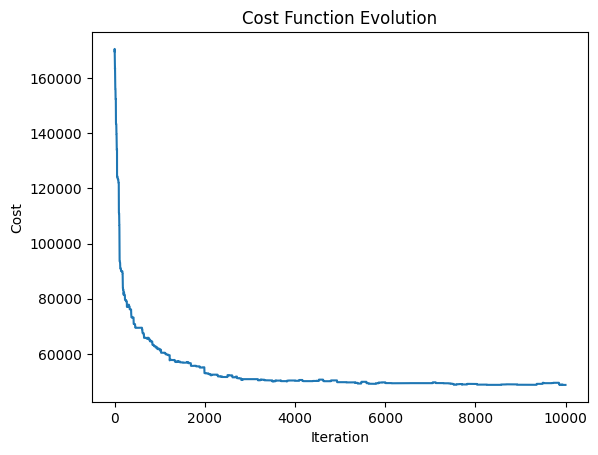

In [ ]:
# Run simulated annealing with logarithmic cooling schedule
initial_temperature = 1000.0
best_tour_log, best_cost_log, costs_log, iterations_log = simulated_annealing_log(num_cities, max_iterations, initial_temperature)

print("Best tour (Logarithmic Cooling Schedule):", best_tour_log)
print("Best cost (Logarithmic Cooling Schedule):", best_cost_log)
plot_cost_function(costs_log, iterations_log)